<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Описание-исследования" data-toc-modified-id="Описание-исследования-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Описание исследования</a></span></li><li><span><a href="#Цель-исследования." data-toc-modified-id="Цель-исследования.-1.0.2"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>Цель исследования.</a></span></li><li><span><a href="#Задачи-исследования." data-toc-modified-id="Задачи-исследования.-1.0.3"><span class="toc-item-num">1.0.3&nbsp;&nbsp;</span>Задачи исследования.</a></span></li><li><span><a href="#Исходные-данные." data-toc-modified-id="Исходные-данные.-1.0.4"><span class="toc-item-num">1.0.4&nbsp;&nbsp;</span>Исходные данные.</a></span></li></ul></li></ul></li><li><span><a href="#Часть-1.-Подготовка-данных-для-анализа" data-toc-modified-id="Часть-1.-Подготовка-данных-для-анализа-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Часть 1. Подготовка данных для анализа</a></span></li><li><span><a href="#Часть-2.-Исследовательский-анализ-данных-(EDA)" data-toc-modified-id="Часть-2.-Исследовательский-анализ-данных-(EDA)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Часть 2. Исследовательский анализ данных (EDA)</a></span></li><li><span><a href="#Часть-3.--Модель-прогнозирования-оттока-пользователей" data-toc-modified-id="Часть-3.--Модель-прогнозирования-оттока-пользователей-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Часть 3.  Модель прогнозирования оттока пользователей</a></span></li><li><span><a href="#Часть-4.-Кластеризация-клиентов" data-toc-modified-id="Часть-4.-Кластеризация-клиентов-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Часть 4. Кластеризация клиентов</a></span></li><li><span><a href="#Часть-5.-Выводы-и-базовые-рекомендации-по-работе-с-клиентами" data-toc-modified-id="Часть-5.-Выводы-и-базовые-рекомендации-по-работе-с-клиентами-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Часть 5. Выводы и базовые рекомендации по работе с клиентами</a></span></li></ul></div>

## Описание проекта

#### Описание исследования
Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с пользователями на основе аналитических данных. Требуется подготовить аналитические данные и дать рекомендации (прогноз оттока, портреты пользователей, факторные признаки и пр.).
    
_____
#### Цель исследования.
Провести анализ и подготовить план действий по удержанию клиентов.
    
_____
#### Задачи исследования.

1. Проведести исследовательский анализ данных.
2. Построить модель прогноза оттока пользователей. 
3. Кластеризировать пользователей.
4. Сформулировать выводы и дать рекомендации по результатам анализа.

_____
#### Исходные данные.
    
Данные на месяц до оттока и факт оттока на определённый месяц.  
______

##  Часть 1. Подготовка данных для анализа

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
import seaborn as sns, numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install seaborn --upgrade  
!pip install seaborn

In [3]:
try:
    gym = pd.read_csv('gym_churn.csv', sep=',')
except:
    gym = pd.read_csv('/datasets/gym_churn.csv', sep=',')

In [4]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


В исходном датасете:
* `Churn` — факт оттока в текущем месяце;
Текущие поля в датасете:  
* `gender` — пол;
* `Near_Location` — проживание или работа в районе, где находится фитнес-центр;
* `Partner` — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
* `Promo_friends` — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
* `Phone` — наличие контактного телефона;
* `Age` — возраст;
* `Lifetime` — время с момента первого обращения в фитнес-центр (в месяцах);  
Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
* `Contract_period` — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
* `Month_to_end_contract` — срок до окончания текущего действующего абонемента (в месяцах);
* `Group_visits` — факт посещения групповых занятий;
* `Avg_class_frequency_total` —  средняя частота посещений в неделю за все время с начала действия абонемента;
* `Avg_class_frequency_current_month` — средняя частота посещений в неделю за предыдущий месяц;
* `Avg_additional_charges_total` — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.  
В датасете 4000 строк в каждом столбце, пропусков нет.  Типы данных корректны.

##  Часть 2. Исследовательский анализ данных (EDA)

2.1 `Исследуем датасет: есть ли в нем отсутствующие признаки, изучим средние значения и стандартные отклонения:`

In [5]:
gym.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [6]:
gym.columns = gym.columns.str.lower()

На основе полученных данных можно отметить:
* в данных о поле распределение близко к 50/ 50. Стандартное отклонение - 0.5.
* около 80% клиентов из выборки проживают или работают в районе, где находится фитнес-центр. Стандартное отклонение не значительное (0,36).
* 49% клиентов - сотрудники компании-партнёра клуба. Стандартное отклонение - 0,5.
* 30% клиентов - использовали промо-код от знакомого при оплате первого абонемента. Стандартное отклонение - 0,46.
* 90% клиентов из выборки указан контактный телефон. Стандартное отклонение - 0,29.
* различается длительность текущего действующего абонемента. В среднем она составляет 4-5 месяцев, медианное значение 1 месяц. Возможно, есть выбросы.Максимальный абонемент годовой.
* 41% клиентов посещают групповые занятия. Стандартное отклонение небольшое - 0,49.
* Максимальный возраст клиентов - 41 год, среднее значение возраста рядм с медианой - 29 лет, значит, скорее всего, с распределением возрастов все в порядке. Минимальный возраст клиентов - 18 лет.
* Суммарная выручка от других услуг фитнес-центра (кафе, спорт-товары, косметический и массажный салон) в среднем составляет 147 у.е., медианное значение довольно близко к среднему - 136 у.е. Стандартное отклонение довольно ощутимое - 96.3. Максимальный размер трат - 552 у.е.
* Средний срок до окончания текущего действующего абонемента - 4 месяца, медианное значение - 1 месяц. Это говорит о том, что на среднее влияют выбросы (масимальное значение 12 месяцев). Также уже сейчас можно заметить, что клиентов, у которых остался всего месяц до окончания абонемента, больше, чем клиентов, у которых абонемент только начался.
*  большиство клиентов новички, с момента первого обращения в фитнес-центр (в месяцах) проходит около 3 месяцев назад. Максимальное значение для этой величины около 3 лет.
* средняя частота посещений в неделю за все время с начала действия абонемента - 1-2 раза. Максимальное значение - 6 дней в неделю. Стандартное отклонение - 0.9.
* средняя частота посещений в неделю за предыдущий месяц - 1-2 дня.
* Отток в текущем месяце составил 26%. Стандартное отклонение - 0,44.  
2.2. `Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался:`

In [7]:
display(gym.groupby('churn')['gender'].agg('count'))

churn
0    2939
1    1061
Name: gender, dtype: int64

Отток составил 1061 человек, осталось 2939 человек.

In [8]:
display(gym.groupby('churn').agg('mean'))

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


* Остаются клиенты с более длительным сроком абонемента.
* Нет разницы в распределении по полу.
* Средняя частота посещений в неделю за предыдущий месяц у тех, кто остался,выше и составляет 2 раза в неделю, в то время как у ушедших она была 1 раз в неделю.
* Около 76% ушедших клиентов жили или работали недалеко от фитнес-центр, с этим связан и тот факт, что 18% первоначально записывались в рамках акции «приведи друга».
* ушедшие клиенты также оставляли свой номер телефона.
*  ушедшие клиенты тратили примерно 115 у.е, а оставшиеся вкладывали гораздо больше около 158 у.е.
* среди ушедших средний лайфтайм с момента первого обращения в фитнес-центр - меньше месяца. Значит, есть проблемы с удержанием, клиенты не смогли заинтересоваться и спустя месяц ушли.
* Заметно, что среди тех, кто ушел, только 26% посещали групповые занятие, а среди тех, кто остался, таких 46%.
Видим, что ушедшие - это люди с небольшим перодом контракта: 1-2 месяца. У оставшихся клиентов более длительный период договора (5-6 месяцев).
* Возраст клиентов близок для обеих групп около 26-30 лет.  
2.3. `Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток):`

In [9]:
#hist = [gym[i].hist() if i != 'churn' for i in gym.columns.get_values().tolist()]
gym_churn_1 = gym.query('churn == 1')
gym_churn_0 = gym.query('churn == 0')
columns = gym.drop(columns=['churn']).columns.get_values().tolist()
#выделим отдельно дискретные признаки с малым числом принимаемых значений (в том числе бинарные)
binary_columns = gym.drop(columns=['churn', 'age', 'avg_additional_charges_total', 'avg_class_frequency_total', 'avg_class_frequency_current_month']).columns.get_values().tolist()
def create_hist(df, columns):
    for i in columns:
        plt.figure(figsize =(10, 4))
        #Строим график
        sns.distplot(gym[i], kde=False, norm_hist=True)

        if i not in binary_columns:
            plt.axvline(x=df[i].median(),   
                linewidth=2,
                color='blue',
                linestyle='--')
            #линия 1 квантиля
            plt.axvline(x=df[i].quantile(.025),   
                linewidth=3, 
                color='b', 
                linestyle='--')
            #линия 2 квантиля
            plt.axvline(x=df[i].quantile(.05),   
                linewidth=3, 
                color='b', 
                linestyle='--')
            #Линия 3 квантиля
            plt.axvline(x=df[i].quantile(.75),
                linewidth=3, 
                color='b', 
                linestyle='--')
        #Зададим заголовок
        plt.title('Распределение признака {}'.format(i))
        plt.xlabel('Значение')
        plt.ylabel('Частота')
        plt.grid() 
        plt.show()  

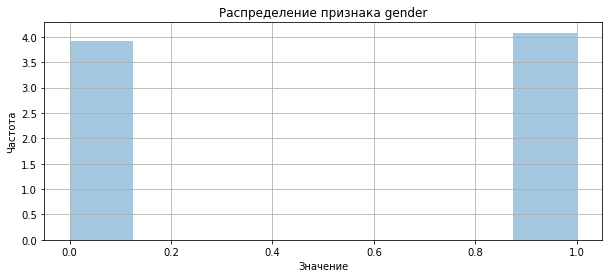

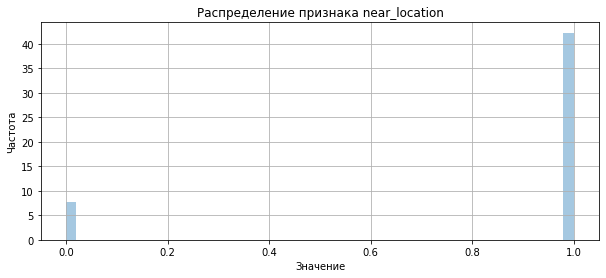

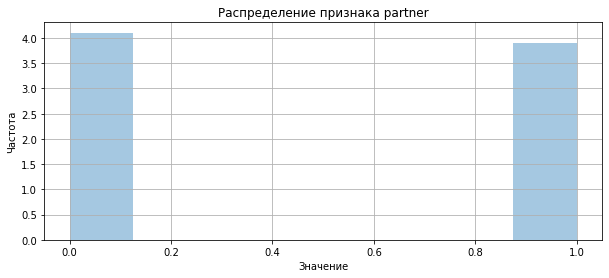

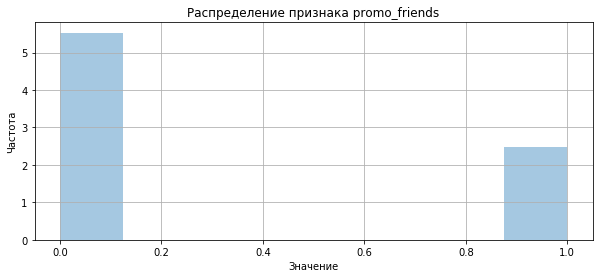

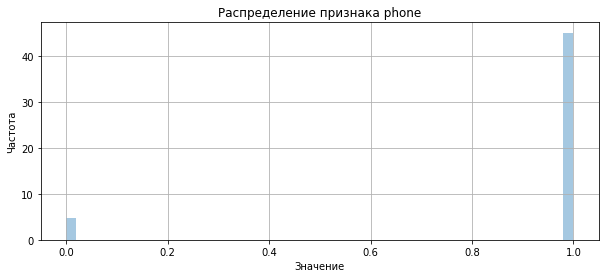

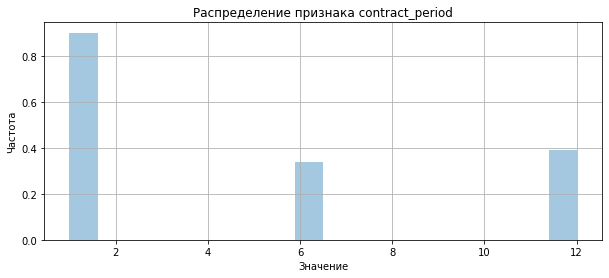

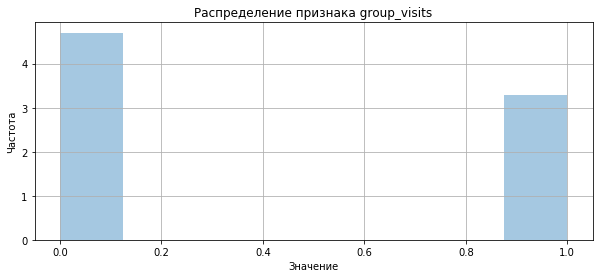

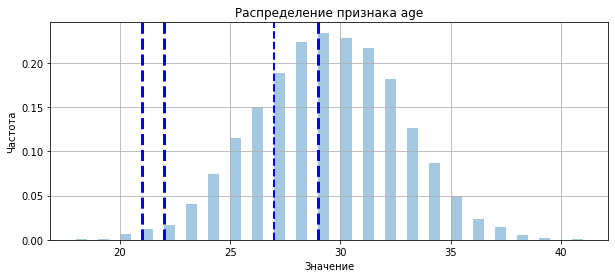

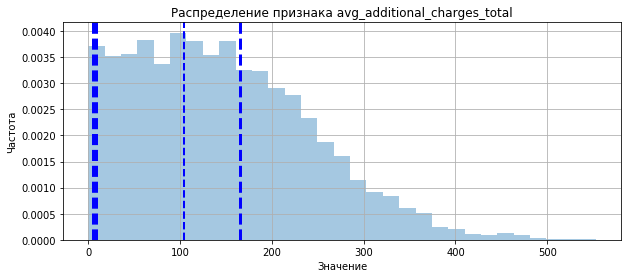

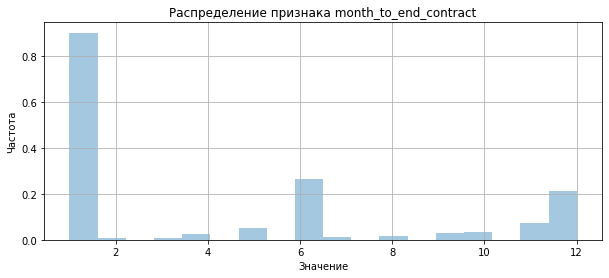

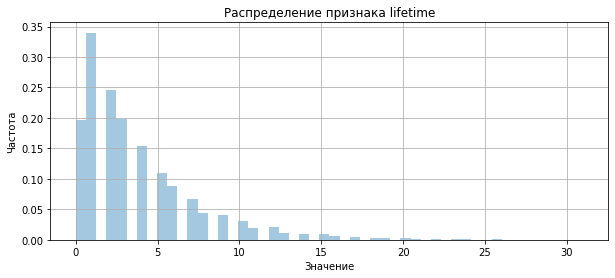

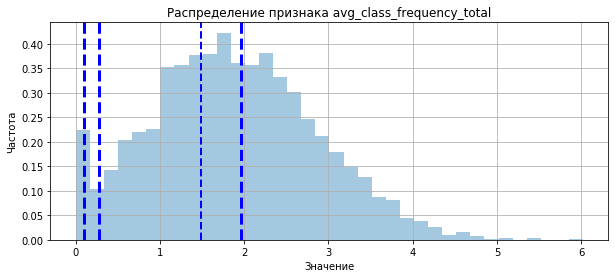

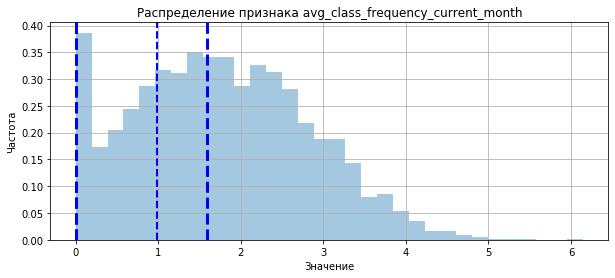

In [10]:
create_hist(gym_churn_1, columns)

Графики иллюстрируют ранее сделанные выводы:
* >гендерное распределение оттока клиентов однородно (50/50);
*  >у 80% фитнес-клуб находился рядом с домом или работой;
* >около 70% не сотрудники компаний-партнёров клуба;
* >более 80% пришли не по акции "приведи друга";
* >только 10% не оставляли контактный номер телефона;
* >в большинстве случаев длительность текущего действующего абонемента составляла 1 месяц (90%). У оставшихся 10% длительность абонемента 6 месяцев.
* >около 80%, оставшиеся 20% занятия посещали;
* >медианное распределение возрасте около 27 лет;
* >рапределение трат на дополнительные услуги смещено влево, есть хвост после 95-го квантиля (> 260 у.е.). Медианное значение трат располагается в районе 100 у.е;
* >до окончания абонемента оставалось около 1 месяца;
* >медианное распределение времени с момента первого обращения в фитнес-центр около 1 месяца;
* >медианное распределение средней частоты посещений в неделю за предыдущий месяц около 1.

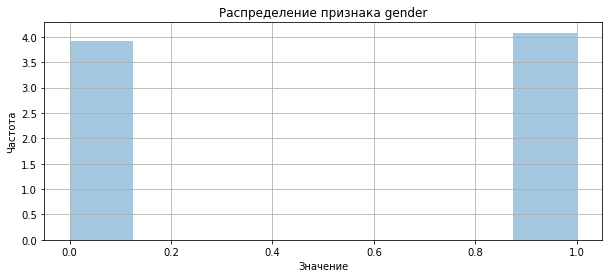

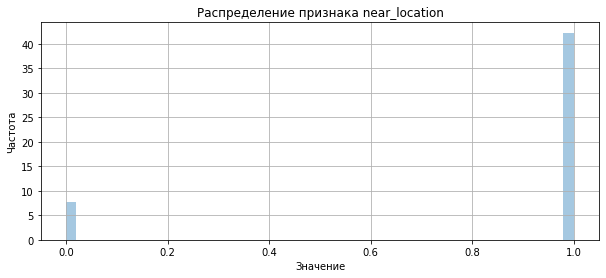

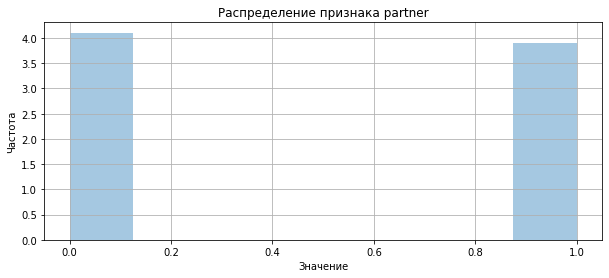

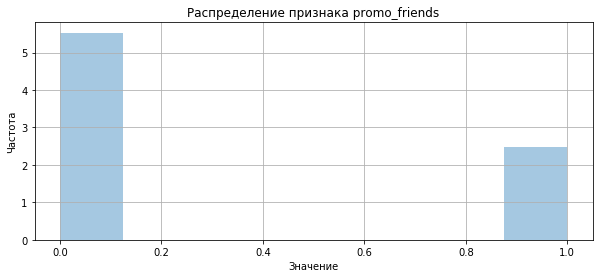

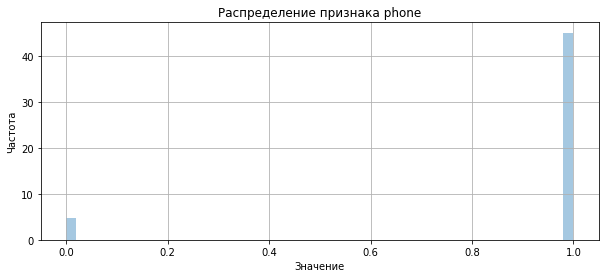

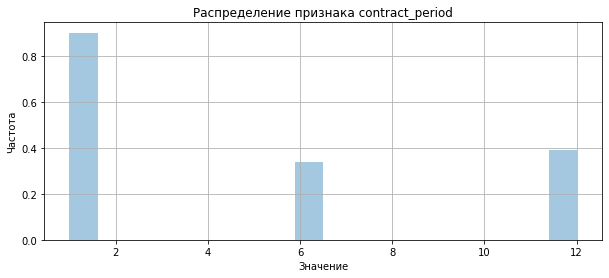

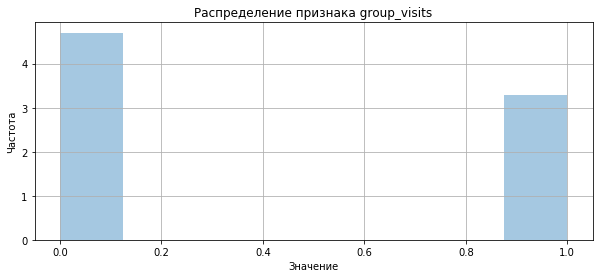

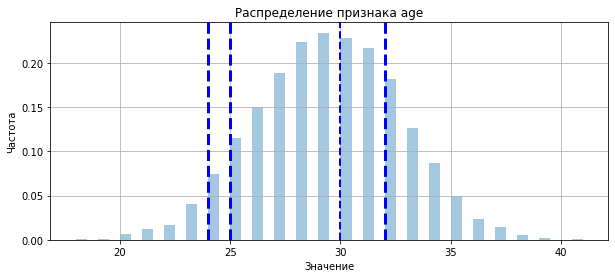

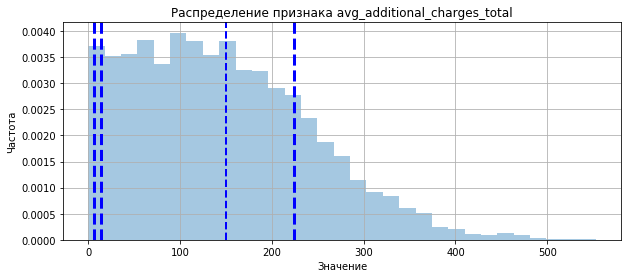

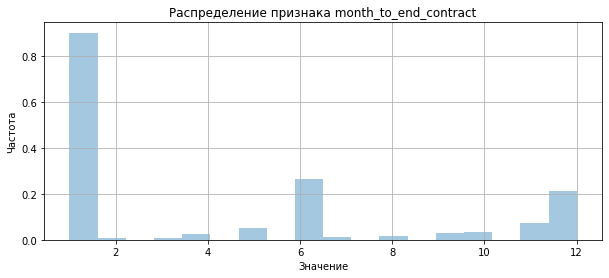

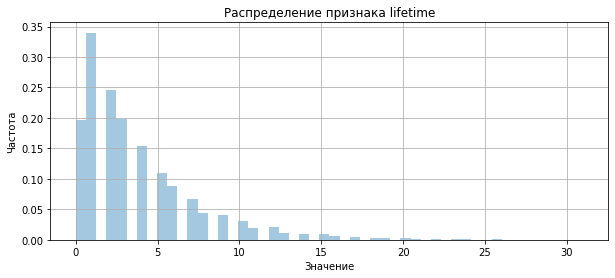

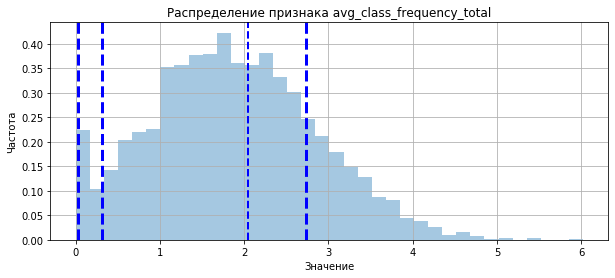

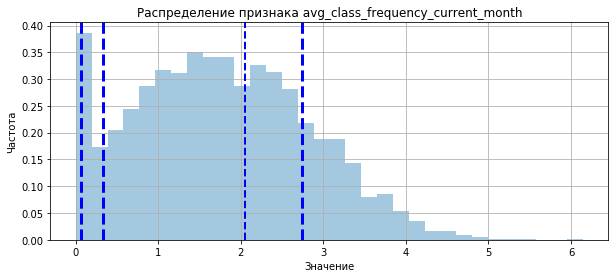

In [11]:
create_hist(gym_churn_0, columns)

Графики иллюстрируют ранее сделанные выводы:
* >гендерное распределение оттока клиентов однородно (50/50);
*  >большинства фитнес-клуб находился рядом с домом или работой;
* >около половины оставшихся - сотрудники компаний-партнёров клуба;
* >более 60% пришли не по акции "приведи друга";
* >большая часть клиентов лояльнее, чем у ушедших в отношении личных данных и оставляла контактный номер телефона;
* >в большинстве случаев длительность текущего действующего абонемента составляла 1 месяц (около 40%), 12 месяцев (около 35%) и 6 месяцев (около 25%).
* >большинство не ходили на групповые занятия (55%), оставшиеся 45% занятия посещали;
* >медианное распределение возрасте около 30 лет;
* >рапределение трат на дополнительные услуги смещено влево, хвост распределения от 340 у.е. Медианное значение трат располагается в районе 150 у.е;
* >до окончания абонемента оставалось около 1 месяца;
* >медианное распределение времени с момента первого обращения в фитнес-центр около 4 месяцев;
* >медианное распределение средней частоты посещений в неделю за предыдущий месяц около 2.  

Можно сделать вывод о том, что разница в средней частоте посещений в неделю за предыдущий месяц выше, спортивные занятия стали привычными.  
2.4. `Построим матрицу корреляций:`

In [12]:
gym.corr().style.background_gradient()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
gender,1,0.00669923,-0.0104626,-0.00503327,-0.00854212,0.000502261,0.0178789,0.0138069,-0.00933444,-0.00128079,0.0135786,0.0146202,0.00915649,0.000707734
near_location,0.00669923,1,-0.00511943,0.210964,-0.0157632,0.150233,0.154728,0.0583578,0.0407612,0.143961,0.0709206,0.0431275,0.0626636,-0.128098
partner,-0.0104626,-0.00511943,1,0.45196,0.00996961,0.306166,0.0227096,0.0474797,0.0229412,0.294632,0.0612294,0.0249379,0.0455611,-0.157986
promo_friends,-0.00503327,0.210964,0.45196,1,0.00198159,0.244552,0.12017,0.0501133,0.0368977,0.239553,0.0727211,0.0280632,0.0537684,-0.162233
phone,-0.00854212,-0.0157632,0.00996961,0.00198159,1,-0.00689326,-0.0100991,-0.0114032,0.00927943,-0.0111963,-0.0188012,0.00834047,0.0133749,-0.0011766
contract_period,0.000502261,0.150233,0.306166,0.244552,-0.00689326,1,0.169991,0.138249,0.111445,0.973064,0.170725,0.0962111,0.159407,-0.389984
group_visits,0.0178789,0.154728,0.0227096,0.12017,-0.0100991,0.169991,1,0.0809336,0.0320791,0.163703,0.0758528,0.0566948,0.0759233,-0.175325
age,0.0138069,0.0583578,0.0474797,0.0501133,-0.0114032,0.138249,0.0809336,1,0.0802401,0.134511,0.164693,0.119953,0.183095,-0.404735
avg_additional_charges_total,-0.00933444,0.0407612,0.0229412,0.0368977,0.00927943,0.111445,0.0320791,0.0802401,1,0.113958,0.0790283,0.0444264,0.0795697,-0.198697
month_to_end_contract,-0.00128079,0.143961,0.294632,0.239553,-0.0111963,0.973064,0.163703,0.134511,0.113958,1,0.161078,0.0853867,0.147605,-0.381393


Сразу видно наличие прямой связи между мультиколлинеарными признаками (0,97): длительность текущего действующего абонемента и  срока до окончания текущего действующего абонемента. Кроме того, наблюдается мультиколлинеарность (0,95) между средней частотой посещений в неделю за все время с начала действия абонемента и средней частотой посещений в неделю за предыдущий месяц.

Требуется удалить по одному из мультиколлинеарных признаков в каждой паре:

In [13]:
gym = gym.drop(columns=['contract_period', 'avg_class_frequency_current_month'])

`Выводы`:
* Остаются клиенты с более длительным сроком абонемента.
* Нет разницы в распределении по полу.
* Средняя частота посещений в неделю за предыдущий месяц у тех, кто остался,выше и составляет 2 раза в неделю, в то время как у ушедших она была 1 раз в неделю.
* Около 76% ушедших клиентов жили или работали недалеко от фитнес-центр, с этим связан и тот факт, что 18% первоначально записывались в рамках акции «приведи друга».
* ушедшие клиенты также оставляли свой номер телефона.
*  ушедшие клиенты тратили примерно 115 у.е, а оставшиеся вкладывали гораздо больше около 158 у.е.
* среди ушедших средний лайфтайм с момента первого обращения в фитнес-центр - меньше месяца. Значит, есть проблемы с удержанием, клиенты не смогли заинтересоваться и спустя месяц ушли.
* Заметно, что среди тех, кто ушел, только 26% посещали групповые занятие, а среди тех, кто остался, таких 46%.
Видим, что ушедшие - это люди с небольшим перодом контракта: 1-2 месяца. У оставшихся клиентов более длительный период договора (5-6 месяцев).
* Возраст клиентов близок для обеих групп около 26-30 лет.  

##  Часть 3.  Модель прогнозирования оттока пользователей

Построим модель бинарной классификации клиентов,целевым признаком будет являться объем оттока клиента в следующем месяце.

Разобьем данные на обучающую и валидационную выборку:

In [14]:
# разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = gym.drop(columns=['churn'])
y = gym['churn']

# разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Обучим модель на train-выборке двумя способами:
* логистической регрессией,
* случайным лесом.
Оценим метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравним по ним модели. 

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [16]:
# список моделей
models = [
    LogisticRegression(random_state=0),
    RandomForestClassifier(random_state=0)
]

# функция, которая принимает на вход модель и данные и выводит метрики
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(
        'Accuracy:{:.2f} Precision:{:.2f} Recall:{:.2f}'.format(
            accuracy_score(y_test, y_pred),
            precision_score(y_test, y_pred),
            recall_score(y_test, y_pred),
        )
    )

In [17]:
# цикл, который выводит метрики по списку моделей
for i in models:
    print(i)
    make_prediction(m=i, X_train=X_train, y_train=y_train,
                    X_test=X_test, y_test=y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy:0.88 Precision:0.76 Recall:0.77
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
Accuracy:0.88 Precision:0.79 Recall:0.72


Метрика accuracy, которая описывает общую точность предсказания модели по всем классам, для обеих моделей высокая 88%, но точность и полнота их ниже, чем следовало бы, хотя для регрессионной модели на валидационной выборке качество модели немного выше.

## Часть 4. Кластеризация клиентов

Отложим в сторону столбец с оттоком и проведем кластеризацию объектов (клиентов). Для этого выполним ряд действий:
1. Стандартизируем данные.
2. Постройтим матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуем дендрограмму. 
3. Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов. За число кластеров принимается n=5.

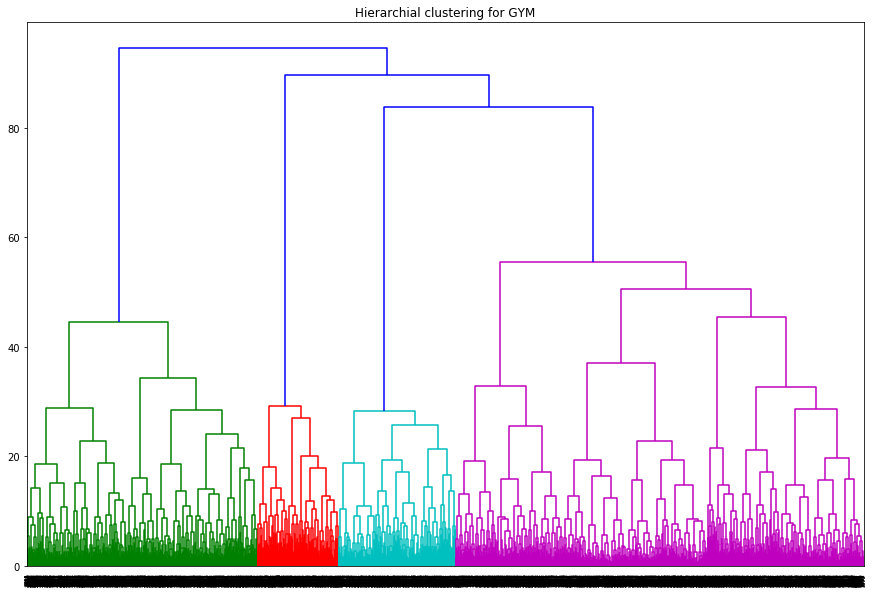

In [18]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 

# обязательная стандартизация данных перед работой с алгоритмами
sc = StandardScaler()
X_sc = sc.fit_transform(X)

linked = linkage(X_sc, method = 'ward') 

plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering for GYM')
plt.show() 


Из диаграммы видно, что можно разбить данные на 4 кластера, а не 5, но в 4 кластере (фиолетовом) в этом случае будет заметно больше данных, чем в остальных. Разбивка на 5 кластеров позволит распределить объем равномернее.

In [19]:

km = KMeans(n_clusters=5, random_state=0) # задаём число кластеров, равное 5, и фиксируем значение random_state для воспроизводимости результата
labels = km.fit_predict(X_sc) # применяем алгоритм к данным и формируем вектор кластеров 

Посмотрим на средние значения признаков:

In [20]:
# сохраняем метки кластера в поле нашего датасета
gym['cluster_km'] = labels

# выводим статистику по средним значениям наших признаков по кластеру
clusters = gym.groupby('cluster_km').mean().round(3)
clusters

,gender,near_location,partner,promo_friends,phone,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,churn
cluster_km,,,,,,,,,,,,
0,0.499,0.995,0.889,1.000,1.0,0.519,29.543,152.139,6.266,4.211,1.952,0.133
1,0.501,0.000,0.488,0.077,1.0,0.232,28.686,137.277,2.804,2.978,1.763,0.402
2,0.521,0.996,0.418,0.011,1.0,0.547,30.805,177.104,6.163,5.702,2.319,0.017
3,0.512,1.000,0.197,0.054,1.0,0.297,27.819,124.626,1.899,2.059,1.539,0.506
4,0.523,0.863,0.472,0.306,0.0,0.427,29.298,144.208,4.466,3.940,1.854,0.267


 Основные закономерности в кластерах:
* >кластер 0. Клиенты этого сегмента живут или работают недалеко от фитнес-зала, являются сотрудниками компании-партнёра клуба и пришли по акции друзей. Групповые занятия могут как пропускать, так и посещать. Тратят, в среднем 152,1 у.е., им остается чуть более 6 мес до окончания договора. Недельная посещаемость клиентов этого сегмента составляла около 2 раз. Эта группа лояльна, отток клиентов составляет `13,3%`. Оставляли контактный номер телефона.
* >кластер 1. Клиенты живут далеко от фитнес-зала и пришли не по акции, но около 50% являются сотрудниками компании-партнёра клуба. Тратят такие клиенты заметно меньше, чем кластер 0, 137,3 у.е. В групповых занятиях практически не участвуют. При этом до конца договора осталось менее 3 мес., отток высокий `40,2%`.Оставляли контактный номер телефона.
* >кластер 2. Клиенты этого сегмента живут или работают недалеко от фитнес-зала, около 40% являются сотрудниками компании-партнёра клуба.Пришли не по ации друзей и в 54,7% случаев посещали групповые занятия. Этот кластер тратил больше прочих 177.10 у.е. До конца договора оставалось около полугода. Оставляли контактный номер телефона. Отток в этой группе минимален`1,7%`
* >кластер 3.Клиенты этого сегмента живут или работают недалеко от фитнес-зала, не являются сотрудниками компании-партнёра клуба и пришли не по акции друзей. Оставляли контактный номер телефона. Тратили около 124,6 у.е. Групповые занятия пропускают. Отток таких клиентов максимален `50,6%`
* > кластер 4. Клиенты этого сегмента живут или работают недалеко от фитнес-зала, около 50% являются сотрудниками компании-партнёра клуба. Приходят чаще всего не по акции, не оставляют номер телефона. Затраты составляют  144,2 у.е. До окончания контракта остается около 4 месяцев, отток таких клиенов `26,7%`

Построим распределение признаков для кластеров:

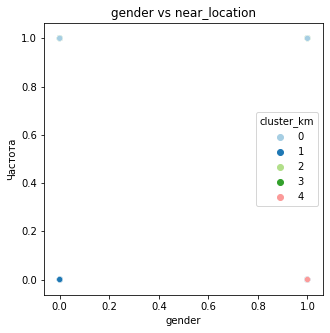

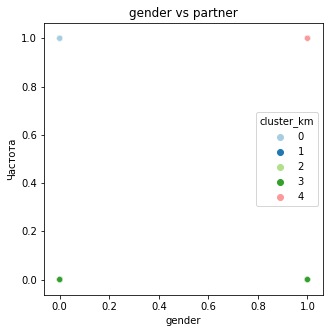

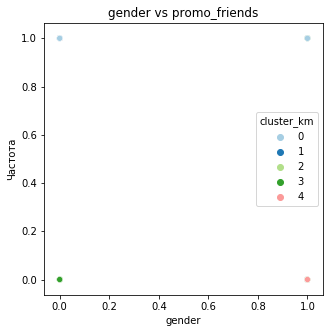

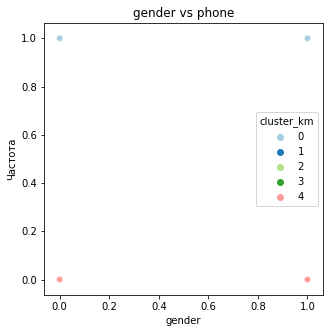

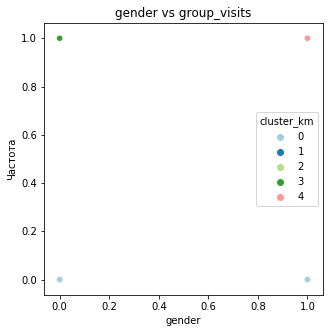

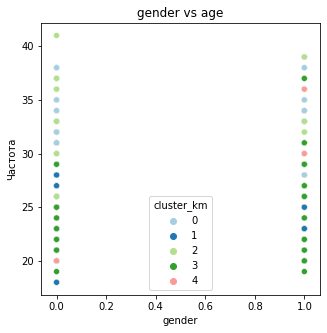

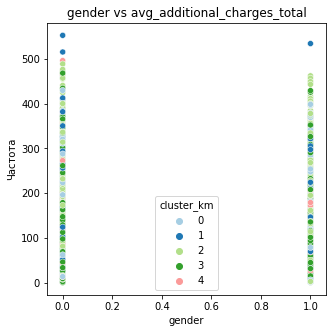

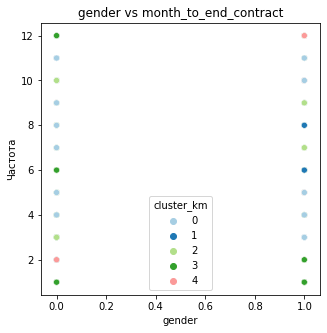

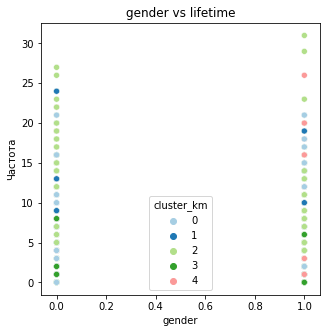

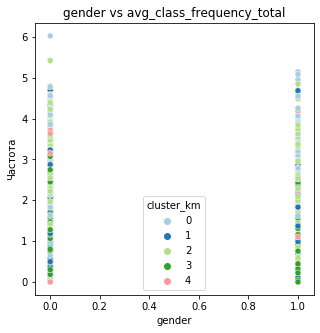

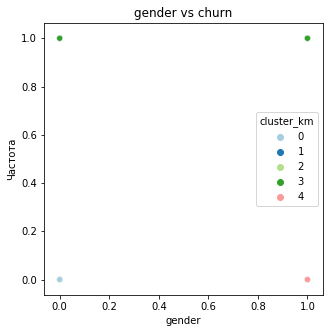

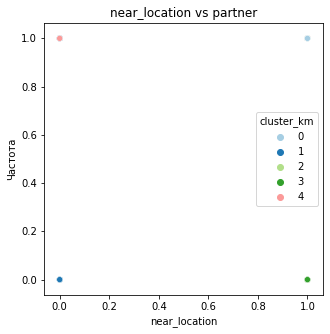

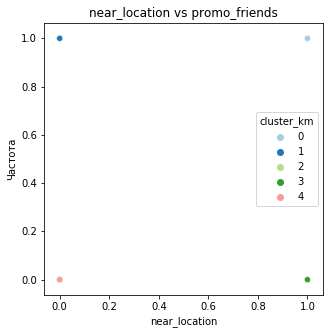

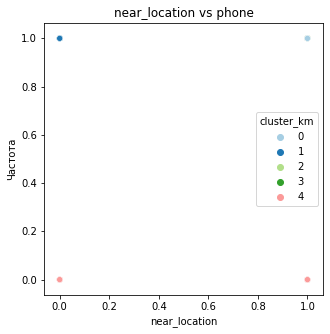

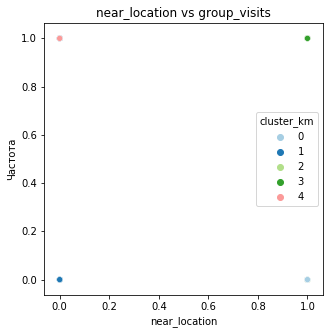

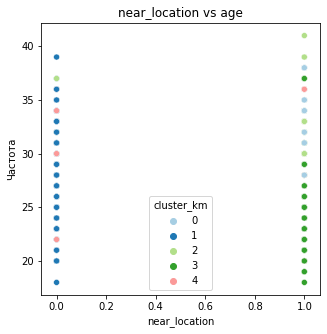

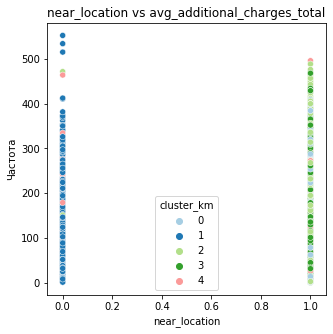

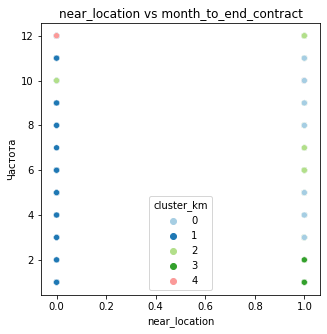

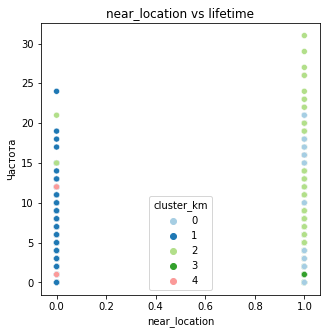

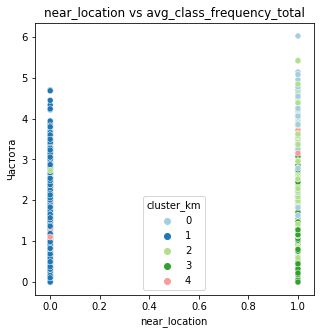

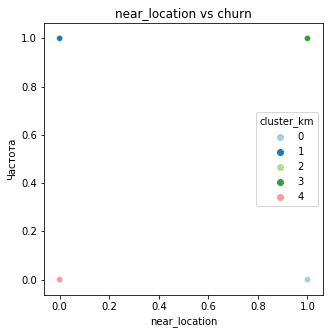

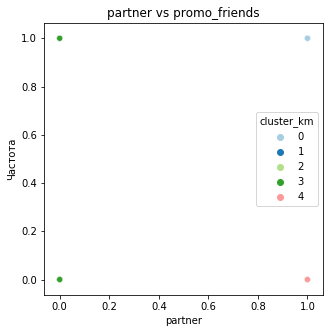

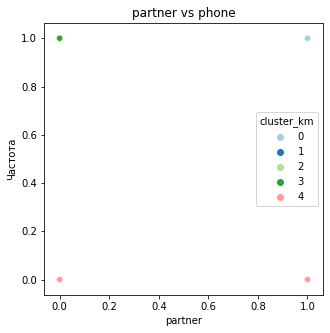

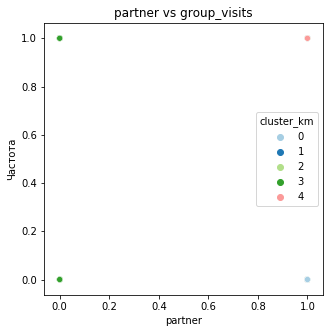

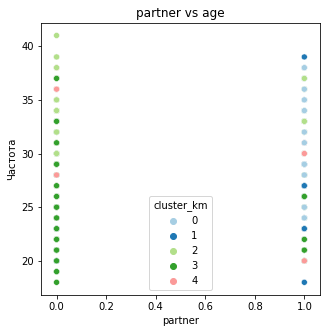

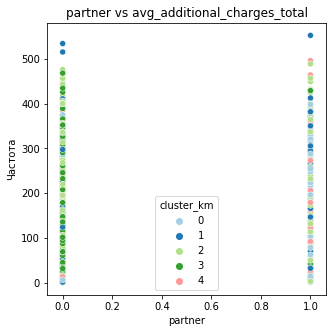

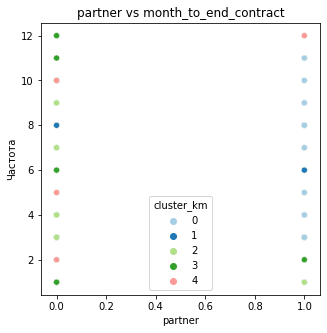

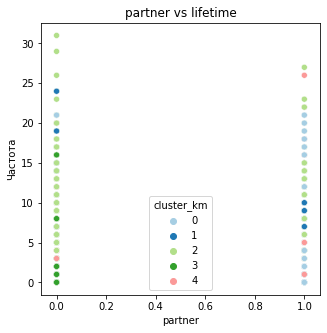

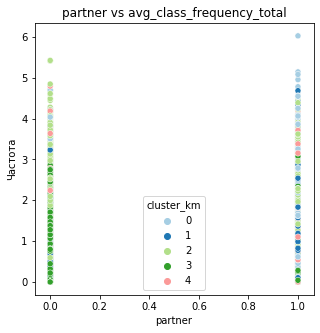

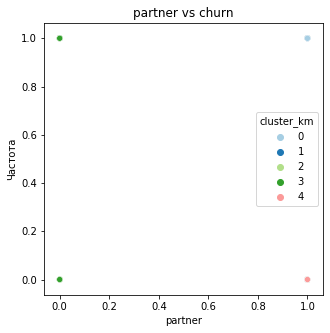

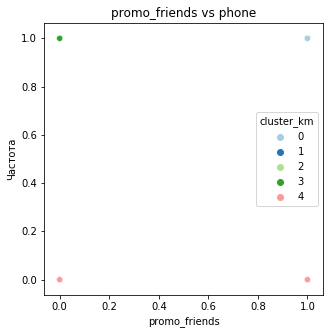

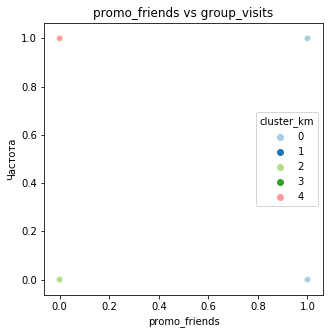

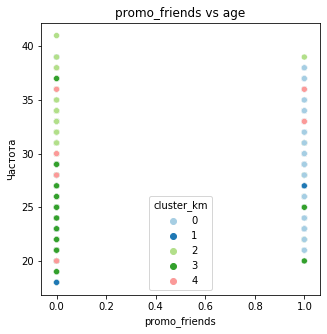

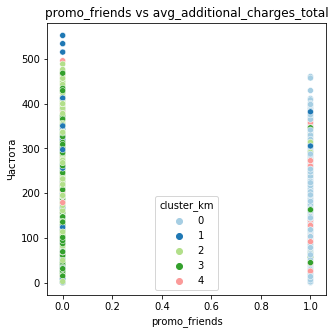

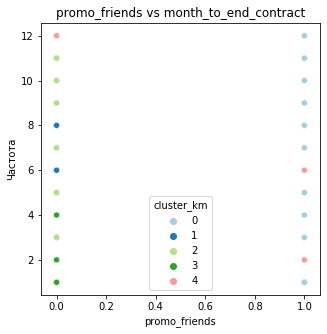

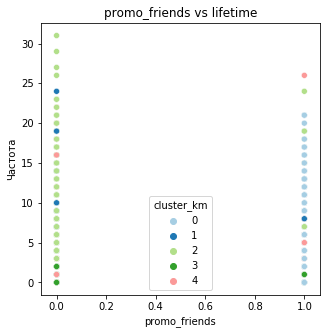

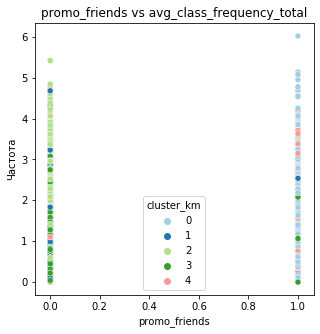

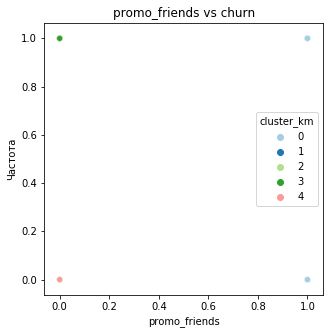

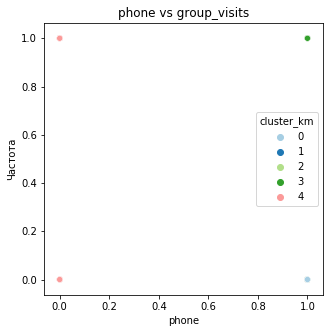

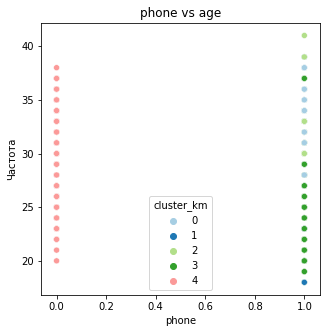

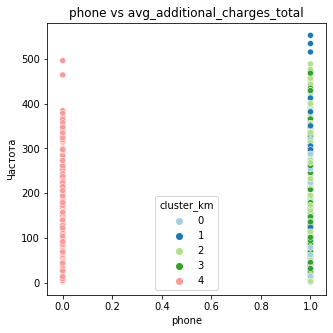

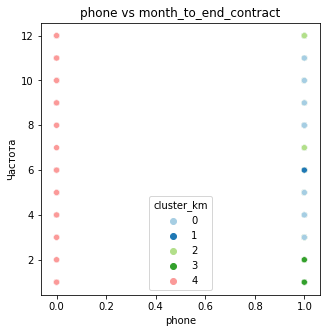

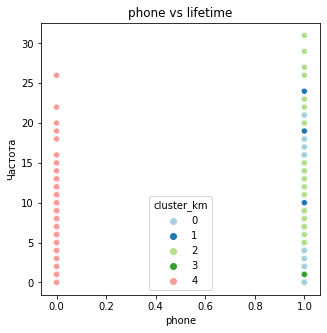

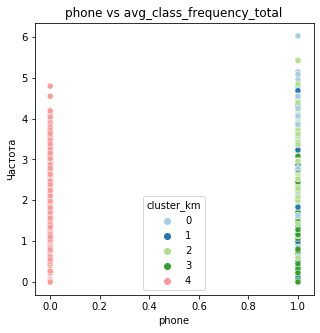

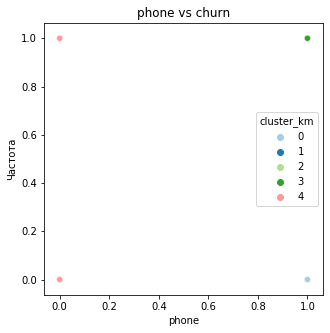

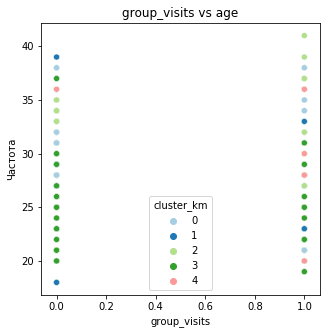

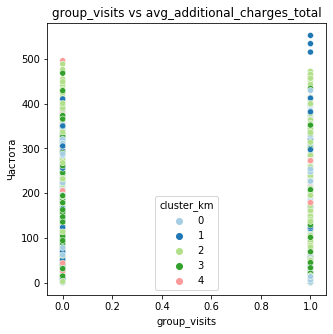

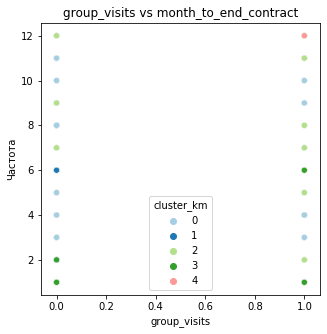

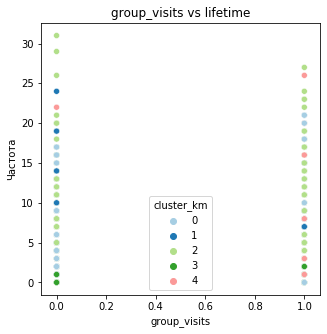

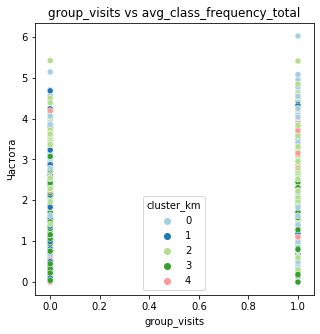

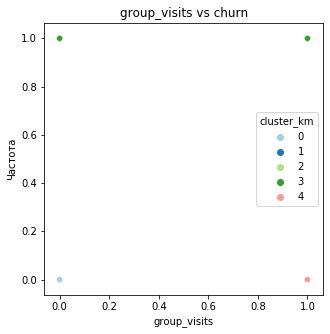

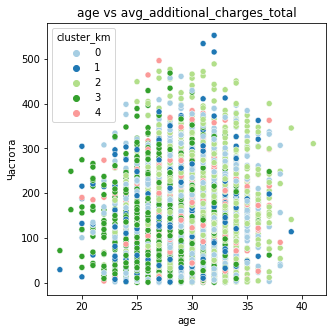

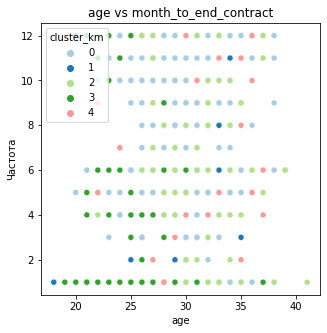

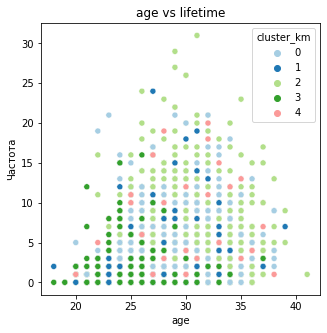

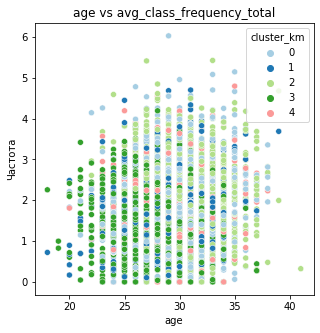

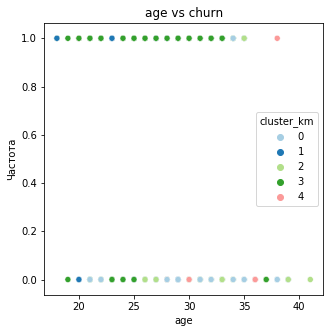

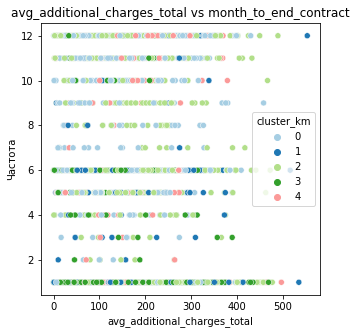

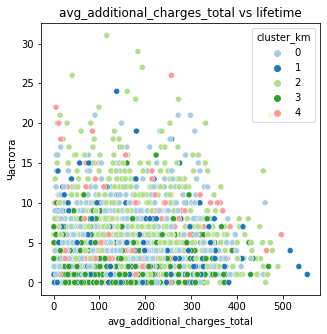

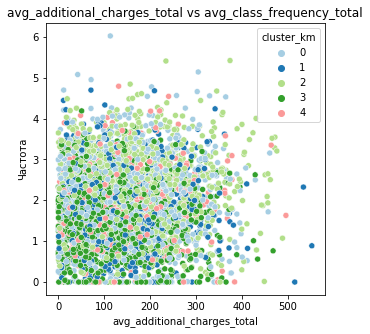

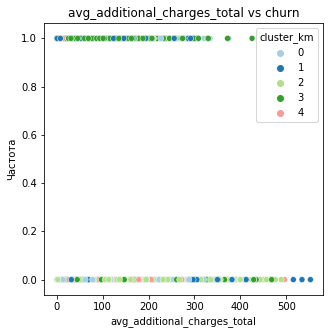

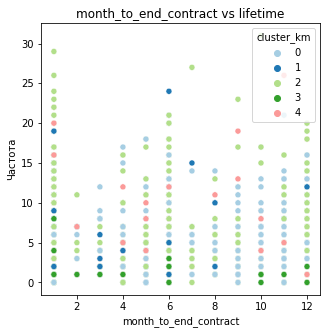

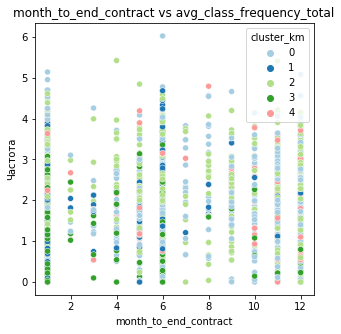

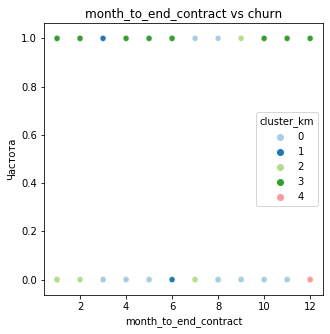

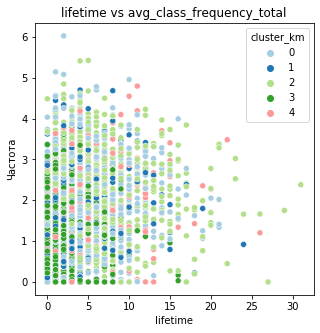

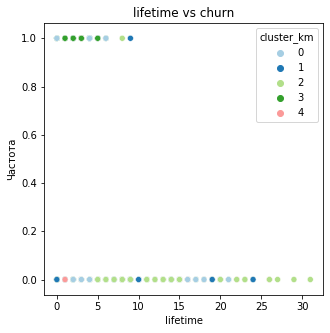

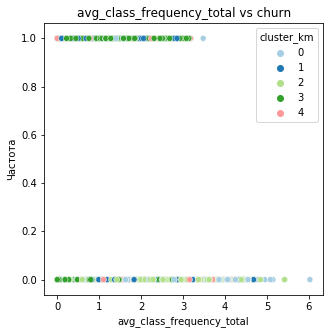

In [21]:
import itertools

# определим функцию отрисовки графиков попарных признаков для кластеров
def show_clusters_on_plot(df, x_name, y_name, cluster_name):
    plt.figure(figsize=(5, 5))
    sns.scatterplot(
        df[x_name], df[y_name], hue=df[cluster_name], palette='Paired'
    )
    plt.ylabel('Частота')
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()

# отрисуем графики для попарных сочетаний признаков с разметкой по кластерам
col_pairs = list(itertools.combinations(gym.drop('cluster_km', axis=1).columns, 2))
for pair in col_pairs:
    show_clusters_on_plot(gym, pair[0], pair[1], 'cluster_km')

Для каждого полученного кластера посчитаем долю оттока (методом groupby()):

In [22]:
#посчитаем долю оттока
churn_share = gym.groupby('cluster_km')['churn'].agg('sum') / gym.groupby('cluster_km')['churn'].size()
churn_share.round(3)

cluster_km
0    0.133
1    0.402
2    0.017
3    0.506
4    0.267
Name: churn, dtype: float64

Кластеры 1 и 3 имеют склонность к оттоку, в них ушло 40 - 50% клентов, в кластере 4 отток меньше, около 26,7%, а кластеры 2 и 0 наиболее надёжны, отток в них составляет всего 1,7 и 13,3% соответственно.

## Часть 5. Выводы и базовые рекомендации по работе с клиентами

`Целевые группы «Культурист-датасаентист»:`
* >кластер 0. Лояльные клиенты, пришедшие по акции друзей, живущие или работающие недалеко от фитнес-зала, которые являются сотрудниками компании-партнёра клуба. Посещают зал около 2 раз в неделю;
* >кластер 2. Клиенты групповых занятий, живущие или работающие недалеко от фитнес-зала, часть из которых является сотрудниками компании-партнёра клуба. Имеют наибольшую вовлеченность в приобретение дополнительных услуг.  

`Меры по снижению оттока:`
* >для целевых сегментов: повышение объема оказываемых услуг (организация акций для стимулирования продаж дополнительных занятий, повышения посещаемости зала);
* >для прочих сегментов: концентрация на удержании (бонусы для клиентов, живущих далеко от локации, скидки по акции "приведи друга", градационная стоимость занятий (занятий на конец периода могут стоит дешевле, чем в начале), формирование социальных групп для новых знакомств.

`Другие особенности взаимодействия с клиентами`:
* >активное ведение страниц клуба в соцсетях и продвижение. Формирование группы благоприятно скажется на всех сегментах и позволит создать открытый для новых участников клуб, в котором более опытные участники и тренеры смогут оказать поддержку для закрепления еженедельных занятий в жизни и мотивировать на достижение целей.
* >проведение более частых групповых занятий, в том числе и бесплатных (например, по акции "Первая неделя бесплатно"). Различные мероприятия после занятий или по вечерам.Возможна организация специальных фитнес-соревнований.

